# 데이터셋 다운로드
https://github.com/bab2min/corpus


## 데이터 선택
- 네이버 쇼핑 리뷰 말뭉치
   - 라벨링 : 5,4(긍정) / 1,2,(부정) -> 별도의 라벨링 작업 필요
- 스팀 리뷰 말뭉치
    - 라벨링 : 1(긍정)/0(부정)
     

### 데이터 로딩
- /t으로 데이터를 구분한 데이터셋(tsv 형식)
- 컬럼데이터가 없기 때문에 read_csv에서 header=None으로 읽기

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from gensim.models import Word2Vec
from konlpy.tag import Okt
pd.set_option('display.max_colwidth',100)

In [3]:
naver = pd.read_csv("./data/naver_shopping.txt", delimiter="\t", header=None)
steam = pd.read_csv("./data/steam.txt", delimiter="\t", header=None)

In [11]:
steam

,label,review
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [6]:
display(naver.info())
display(steam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       200000 non-null  int64 
 1   1       200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       100000 non-null  int64 
 1   1       100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


None

In [10]:
steam.columns=["label","review"]

In [12]:
steam_review_pos=steam[steam["label"]==1]
steam_review_neg=steam[steam["label"]==0]

In [35]:
okt = Okt()

In [37]:
steam_pos_token = [t for doc in steam_review_pos['review'] for t in okt.nouns(doc)]

In [27]:
steam

,label,review
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [28]:
steam_token

['막노동',
 '체험판',
 '막노동',
 '하는사람인데',
 '장비를',
 '내가',
 '사야돼',
 '뭐지',
 '차악!차악!!차악!!!',
 '정말',
 '이래서',
 '왕국을',
 '되찾을',
 '수',
 '있는거야??',
 '시간',
 '때우기에',
 '좋음..',
 '도전과제는',
 '50시간이면',
 '다',
 '깰',
 '수',
 '있어요',
 '역시',
 '재미있네요',
 '전작에서',
 '할수',
 '없었던',
 '자유로운',
 '덱',
 '빌딩도',
 '좋네요^^',
 '재미있었습니다.',
 '은근',
 '쉽지만',
 '은근',
 '어려운',
 '게임',
 '1시간',
 '40분동안',
 '스트레스',
 '다',
 '풀림',
 'ㄹㅇ',
 '재미쩡!!!초반에',
 '좀',
 '힘들어여',
 '도트라서',
 '조아',
 '포켓볼',
 '1도',
 '몰랐는데,',
 '이걸로',
 '배워',
 '갑니다.',
 '심심할때',
 '하면',
 '좋아요.',
 '컴퓨터',
 '상대하는거',
 '제대로',
 '이겨보고',
 '싶은데',
 '잘',
 '안되네요.',
 '트레이아크',
 '사랑해요',
 '핰핰',
 '뭐랄까',
 '다크소울하는느낌이에요',
 '죽으면',
 '돈',
 '다날라가는',
 '방식',
 '렙업하면서',
 '무한',
 '반복인거같은데',
 '재미있습니다클래스도',
 '은근',
 '많은거같고',
 '또',
 '캐릭터',
 '를',
 '계속추가할',
 '예정인가같고그리고',
 '할',
 '요소하고',
 '매번',
 '던전도',
 '바뀌고',
 '재미있습니다',
 '돈이',
 '아깝지않다고',
 '생각드네요',
 'ㅊㅊ',
 '원하는거',
 '보실려면',
 '홈페이지',
 '가셔서',
 'R-18',
 '패치를',
 '사셔야',
 '합니다.',
 '패치가',
 '만원이라',
 '사실상',
 '2만원',
 '주고',
 '게임을',
 '사는',
 '건데...',
 '///ㅁ///',
 '좋던데요?',
 '로지텍',
 '마우스가',
 '드디어'

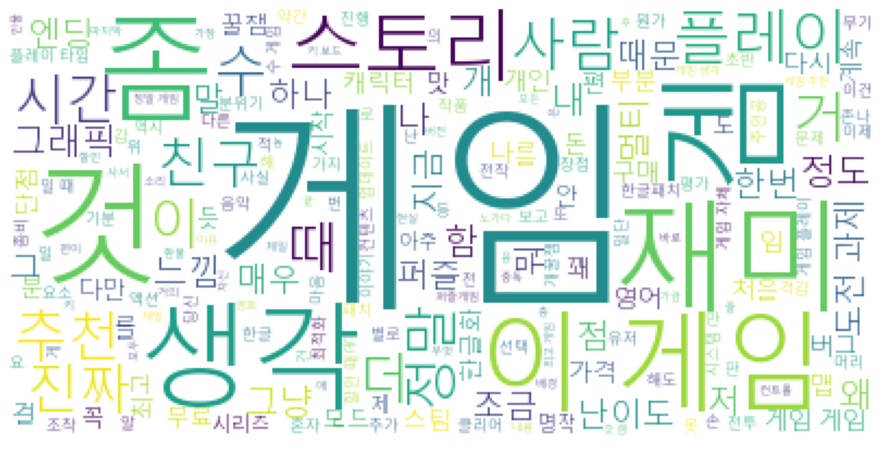

In [40]:
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_pos_token))
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_pos_token))
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축,y축 끄기
plt.show()

In [41]:
steam_neg_token = [t for doc in steam_review_neg['review'] for t in okt.nouns(doc)]

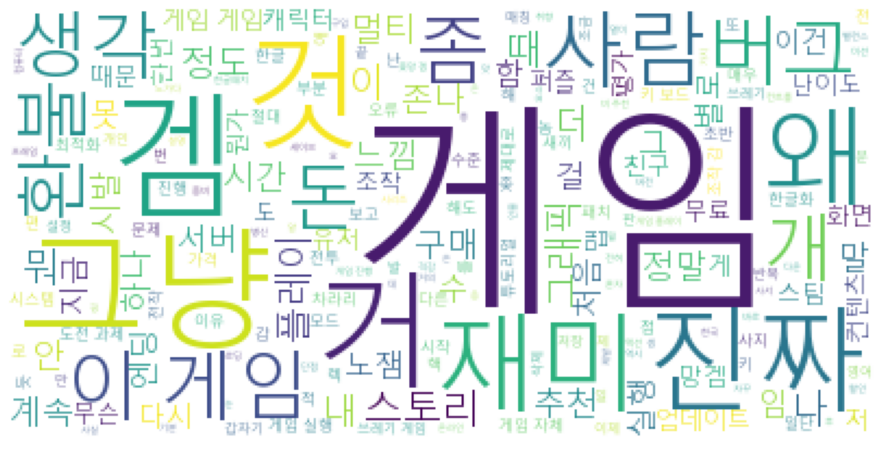

In [42]:
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_neg_token))
wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_neg_token))
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축,y축 끄기
plt.show()

In [43]:
# 형태소 단위로 추출
steam_morphs = [okt.morphs(doc) for doc in (steam['review'])]

In [46]:
w2c = Word2Vec(window=5, min_count=5, sg=1,vector_size=100,  sentences=steam_morphs) 

In [47]:
w2c.wv.most_similar("점수")

[('6/10', 0.6776657700538635),
 ('스코어', 0.6699337363243103),
 ('평점', 0.6644308567047119),
 ('1/10', 0.6594460010528564),
 ('3/10', 0.646918535232544),
 ('메타', 0.6426978707313538),
 ('8/10', 0.6409444212913513),
 ('4/10', 0.6395957469940186),
 ('주고싶네요', 0.6321033835411072),
 ('5.0', 0.627747654914856)]

In [48]:
naver

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송 괜찮아요많이많이파세요다이슨 슈퍼소닉 드라익 케이스입니다
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~
